# Разбор признаков
https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_russian/topic02_visual_analysis/lesson2_telecom_churn_inclass_as_is.ipynb

## 1. Признаки по одному

### 1.1. Количественные
- гистограмма и boxplot

### 1.2. Категориальные
- countplot

## 2. Взаимодействия признаков

### 2.1. Количественный с количественным
- pairplot, scatterplot, корреляции, heatmap

### 2.2. Количественный с категориальным
- boxplot, violinplot

### 2.3. Категориальный с категориальным
- countplot

## 3. Прочее

In [106]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
df = pd.read_csv('dataset/telecom_churn.csv')

In [108]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [109]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

## Количественные
- Смотрим на количественные признаки в общем и на боксплоте смотрим за выбросами

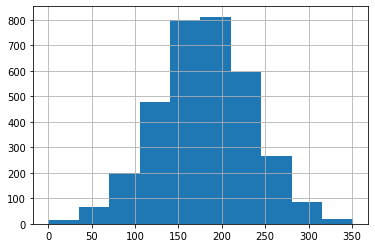

In [110]:
df['total day minutes'].hist();

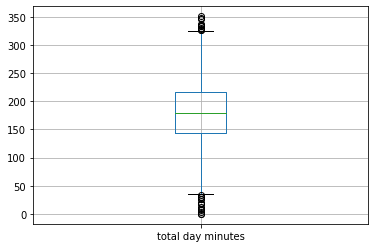

In [111]:
df.boxplot('total day minutes');

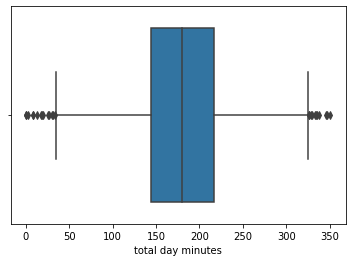

In [112]:
sns.boxplot(df['total day minutes']);

## Категориальные и бинарные признаки
- Смотрим на категориальные признаки через countplot
- countplot

In [113]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

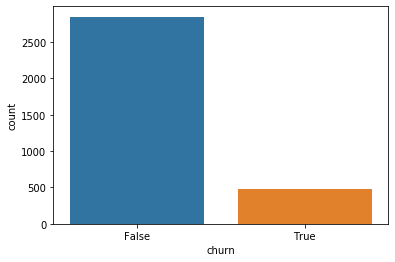

In [114]:
sns.countplot(df['churn']);

In [115]:
df['state'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OR     78
Name: state, dtype: int64

In [116]:
list_state = df['state'].value_counts().head().index
list_state

Index(['WV', 'MN', 'NY', 'AL', 'OR'], dtype='object')

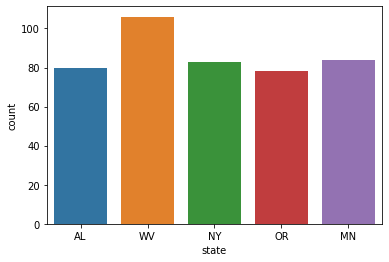

In [117]:
sns.countplot(df[df['state'].isin(list_state)]['state']);

##  Взаимосвязь количественных с количественными
- pairplot, scatterplot, корреляции, heatmap

In [118]:
list_columns = df.columns.tolist()
list_columns

['state',
 'account length',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

In [119]:
charge = [x for x in list_columns if 'charge' in x]

In [228]:
charge

['total day charge',
 'total eve charge',
 'total night charge',
 'total intl charge']

In [120]:
df.head(1)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


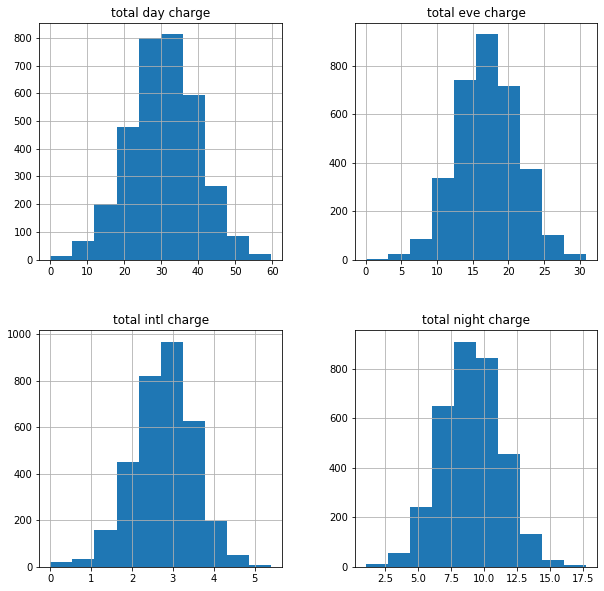

In [121]:
df[charge].hist(figsize=(10, 10));

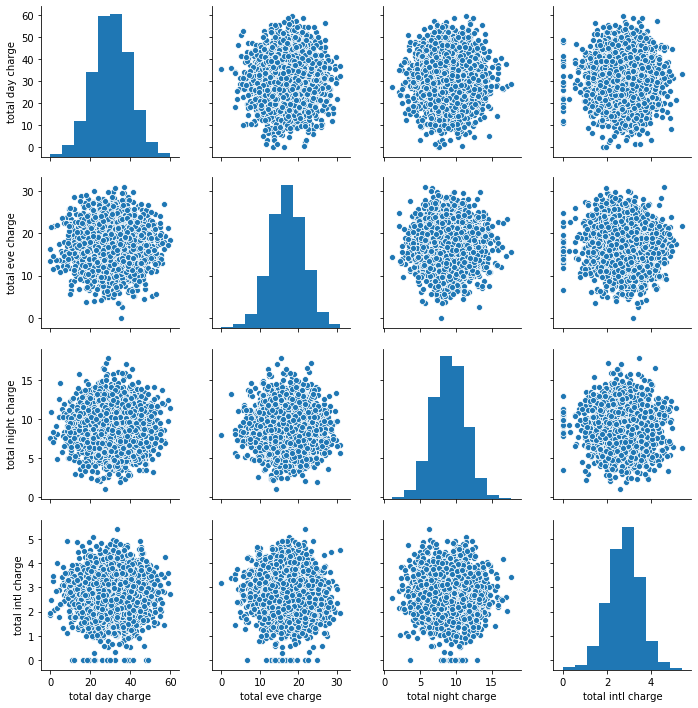

In [122]:
sns.pairplot(df[charge]);

In [123]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [124]:
df['churn'] = df['churn'].map({False: 'blue', True: 'orange'})
df['churn'].unique()

array(['blue', 'orange'], dtype=object)

In [125]:
df['churn'].value_counts()

blue      2850
orange     483
Name: churn, dtype: int64

In [137]:
df['churn'] = df['churn'].map({'blue': False, 'orange': True})

In [140]:
df[df['churn'] == True]['total eve charge']

10      19.42
15      27.01
21      14.44
33      21.45
41      17.33
        ...  
3301    17.19
3304    16.88
3320    16.69
3322    22.57
3323    21.19
Name: total eve charge, Length: 483, dtype: float64

**scatter**

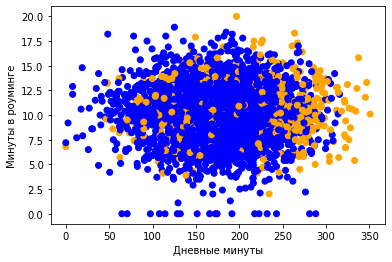

In [153]:
plt.scatter(df['total day minutes'], df['total intl minutes'], 
            color = df['churn'].map({False: 'blue', True: 'orange'}));
plt.xlabel('Дневные минуты')
plt.ylabel('Минуты в роуминге');
legend();

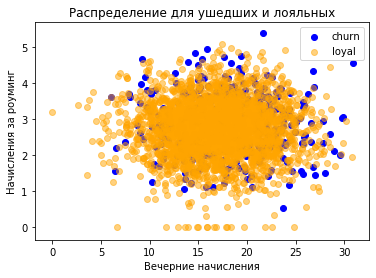

In [158]:
plt.scatter(df[df['churn']]['total eve charge'], 
            df[df['churn']]['total intl charge'],
           color='blue', label='churn');
plt.scatter(df[~df['churn']]['total eve charge'], 
            df[~df['churn']]['total intl charge'],
           color='orange', label='loyal', alpha=0.5);
plt.xlabel('Вечерние начисления');
plt.ylabel('Начисления за роуминг');
plt.legend();
plt.title('Распределение для ушедших и лояльных');

### Корреляция Пирсона

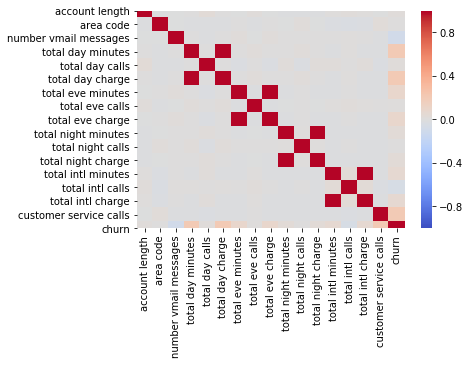

In [180]:
# cmap='coolwarm_r' - инверсия цвета, annot=True - значения корреляции
sns.heatmap(df.corr(), 
            vmin=-1,
            cmap='coolwarm',);

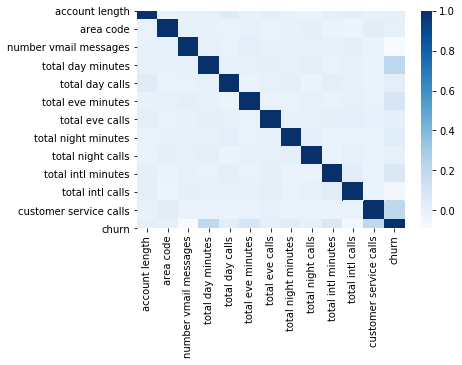

In [227]:
sns.heatmap(df.corr(), 
            cmap='Blues',);

In [181]:
df.drop(charge, axis=1, inplace=True)

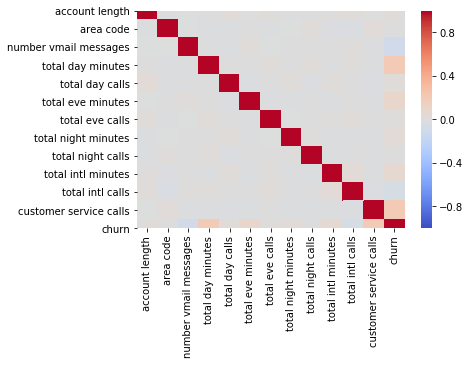

In [182]:
sns.heatmap(df.corr(), 
            vmin=-1,
            cmap='coolwarm',);

##  Взаимосвязь категориальных с количественными
- boxplot
- violinplot

#### Сравнение сколько говорят удедшие и лояльные

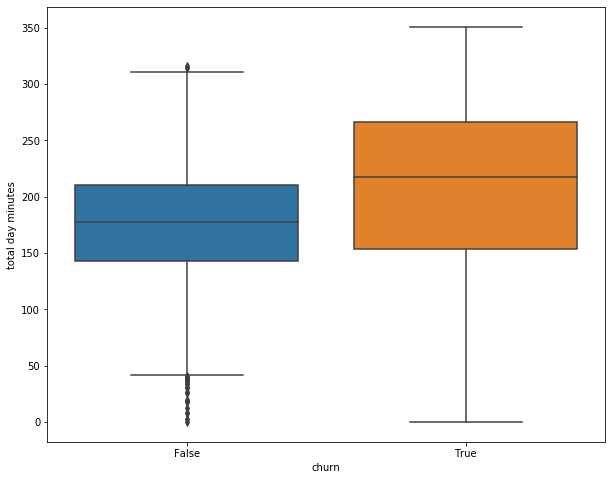

In [192]:
# Увеличение картинки
plt.figure(figsize=(10,8))
sns.boxplot(x='churn', y='total day minutes', data=df);
# Здесь чтобы установить значимость средних нужно обратиться к статистике

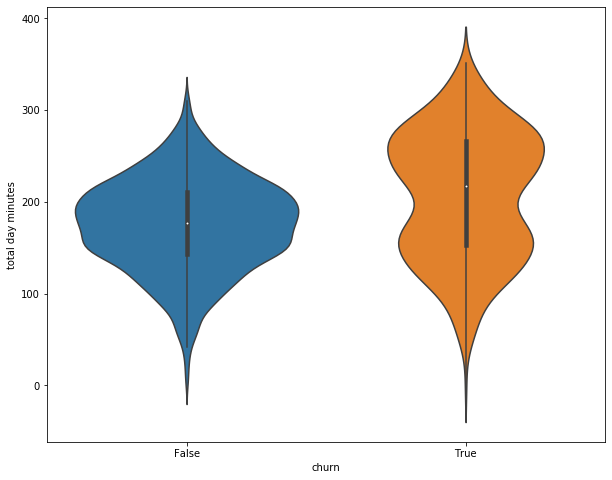

In [211]:
plt.figure(figsize=(10,8))
sns.violinplot(x='churn', y='total day minutes', data=df);

#### Сравнение сколько говорят в разных штатах

In [208]:
x = df[df['state'].isin(df['state'].value_counts().head(3).index)]['state']

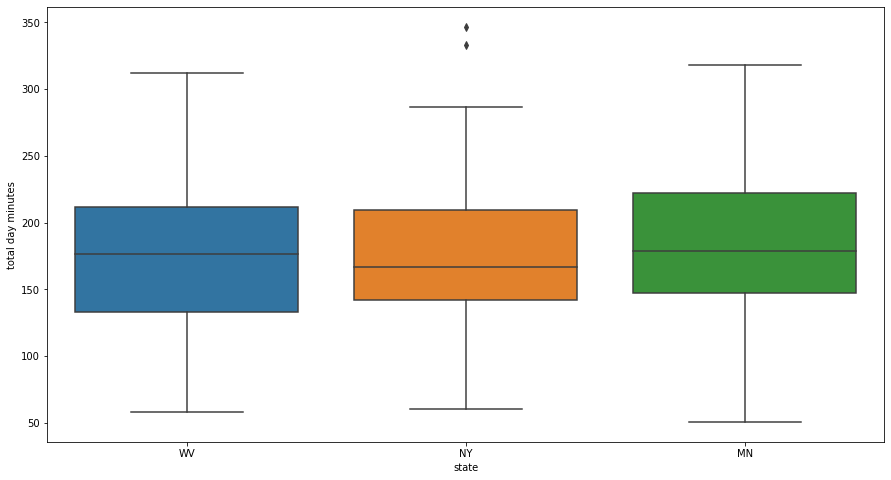

In [209]:
plt.figure(figsize=(15,8))
sns.boxplot(x=x, y='total day minutes', data=df);

## Взаимосвязь категориальных с категориальными

- countplot
- crosstab


In [212]:
 pd.crosstab(df['churn'], df['international plan'])

international plan,no,yes
churn,,
False,2664,186
True,346,137


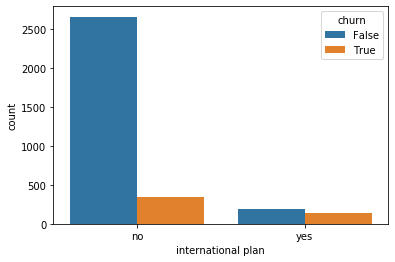

In [218]:
# Видим что если подключен роуминг то клиенты уходят больше
sns.countplot(x='international plan', hue='churn', data=df);

In [221]:
pd.crosstab(df['churn'], df['customer service calls'])

customer service calls,0,1,2,3,4,5,6,7,8,9
churn,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0
True,92,122,87,44,76,40,14,5,1,2


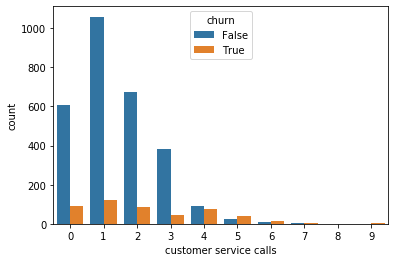

In [223]:
#  Чем больше звонков в сервисный центр тем вероятнне уйдет клиент проявляется после 4
sns.countplot(x='customer service calls', hue='churn', data=df);